In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

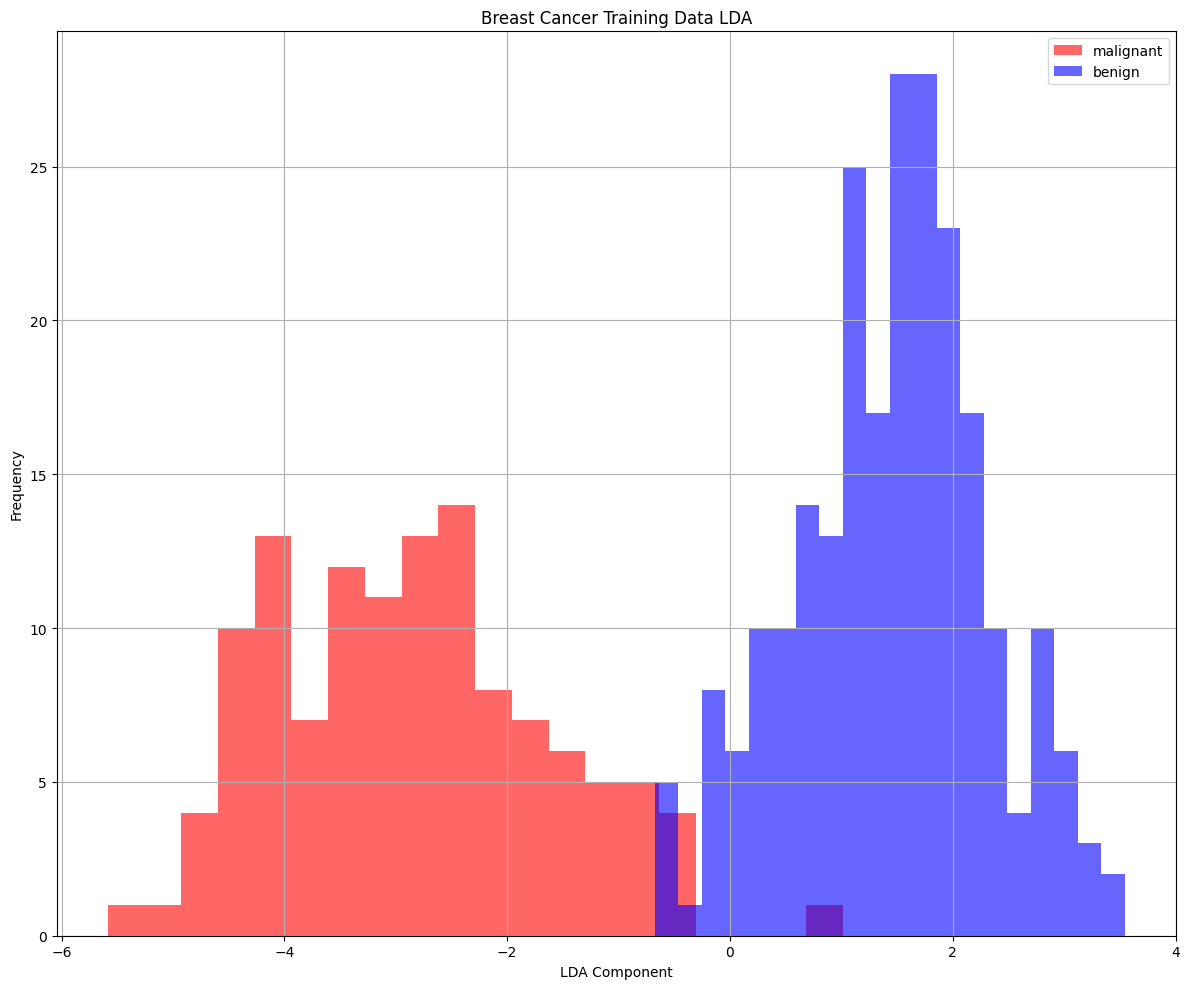

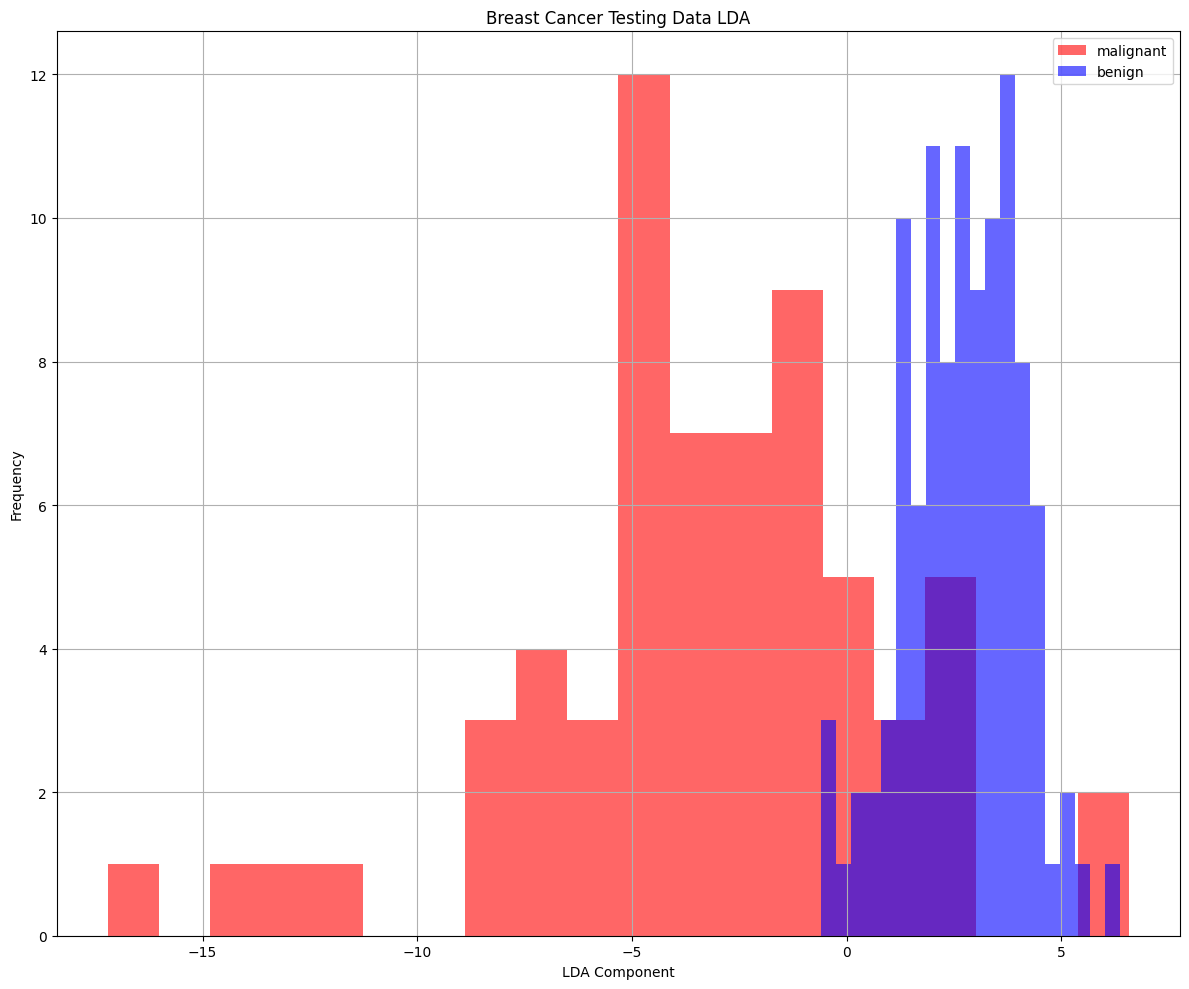

[I 2025-04-27 11:21:40,021] A new study created in memory with name: no-name-48fba909-d040-43e0-93b7-e093160473fa
[I 2025-04-27 11:21:40,035] Trial 0 finished with value: 0.9558219178082192 and parameters: {'C': 0.07210230379091974, 'kernel': 'sigmoid', 'gamma': 4.259200909566805, 'max_iter': 3432}. Best is trial 0 with value: 0.9558219178082192.
[I 2025-04-27 11:21:40,066] Trial 1 finished with value: 0.9752283105022832 and parameters: {'C': 60.31816315559527, 'kernel': 'rbf', 'gamma': 3.9823832794651577, 'max_iter': 9705}. Best is trial 1 with value: 0.9752283105022832.
[I 2025-04-27 11:21:40,079] Trial 2 finished with value: 0.986263318112633 and parameters: {'C': 0.28740864466614086, 'kernel': 'sigmoid', 'gamma': 0.31606762569050134, 'max_iter': 7288}. Best is trial 2 with value: 0.986263318112633.
[I 2025-04-27 11:21:40,101] Trial 3 finished with value: 0.6630136986301369 and parameters: {'C': 0.2830033706521116, 'kernel': 'poly', 'gamma': 0.0013028066820207974, 'degree': 4, 'max_

Best trial:
Accuracy: 0.986263318112633
Best hyperparameters:  {'C': 0.28740864466614086, 'kernel': 'sigmoid', 'gamma': 0.31606762569050134, 'max_iter': 7288}


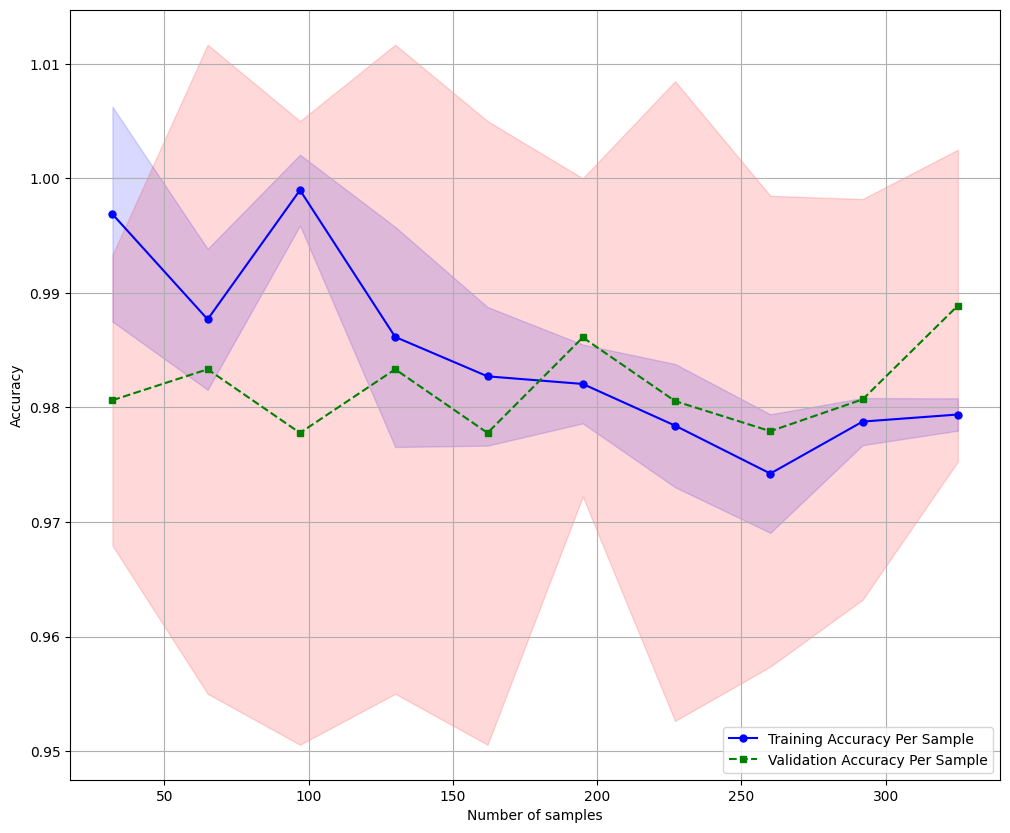

Confusion Matrix
[[ 48  16]
 [  3 104]]
Accuracy: 0.8889, Precision: 0.8667, Recall: 0.9720, F1: 0.9163, AUC: 0.8987


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'm', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'lda', {})

helper.train_and_evaluate_model('svc', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)